In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import average_precision_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [66]:
# Step 2: Load the Dataset
data = pd.read_excel('rwc _dataset.xlsx')

In [ ]:
print(data)

In [68]:
# Step 3: Data Preprocessing
data = data.drop(['Seam number', 'start time (power source time)', 'Jobs'], axis=1)
data = data.dropna()
data = data.apply(pd.to_numeric, errors='coerce')

In [ ]:
print(data)

In [69]:
# Step 4: Feature Selection
# Perform feature selection based on correlation
corr_matrix = data.corr()
selected_features = corr_matrix['Energy(E) [KJ]'].abs().sort_values(ascending=False)[:3].index
data_selected = data[selected_features]

In [70]:
# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_selected)

In [71]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['Energy(E) [KJ]'], test_size=0.2, random_state=42)

In [80]:
# Step 7: Hyperparameter Tuning
threshold = 0.5  # Define your threshold value
y_train_binary = (y_train > threshold).astype(int)
param_grid = {'contamination': np.linspace(0.01, 0.1, 10)}
model = IsolationForest(random_state=42)
scoring = make_scorer(average_precision_score, greater_is_better=True)
grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=5)
grid_search.fit(X_train, y_train_binary)
best_contamination = grid_search.best_params_['contamination']


In [74]:
# Step 8: Model Training and Anomaly Detection
model = IsolationForest(contamination=best_contamination, random_state=42)
model.fit(X_train)

IsolationForest(contamination=0.01, random_state=42)

In [75]:
# Step 9: Predict and Evaluate Anomalies
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
accuracy_train = np.mean(y_pred_train == -1)
accuracy_test = np.mean(y_pred_test == -1)

print(f"Anomaly Detection Train Accuracy: {accuracy_train * 100:.2f}%")
print(f"Anomaly Detection Test Accuracy: {accuracy_test * 100:.2f}%")

Anomaly Detection Train Accuracy: 1.35%
Anomaly Detection Test Accuracy: 5.26%


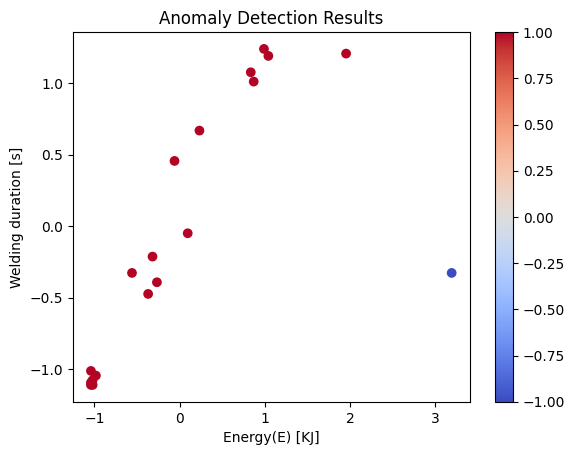

In [79]:
# Step 10: Visualization
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, cmap='coolwarm')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title("Anomaly Detection Results")
plt.colorbar()
plt.show()


Iam  waiting for the  Real-Time dataset
 to proceed to the  the real time anomaly detection.



In [ ]:
# Step 11: Real-Time Anomaly Detection (Assuming streaming data)
new_data = pd.read_excel('new_data.xlsx')
new_data = new_data.drop(['Seam number', 'start time (power source time)', 'Jobs'], axis=1)
new_data = new_data.dropna()
new_data = new_data.apply(pd.to_numeric, errors='coerce')
new_data_selected = new_data[selected_features]
new_data_scaled = scaler.transform(new_data_selected)
new_data_pred = model.predict(new_data_scaled)
anomalies = new_data[new_data_pred == -1]

In [ ]:
if len(anomalies) > 0:
    print("Anomalies detected in real-time data:")
    print(anomalies)
else:
    print("No anomalies detected in real-time data.")

In [ ]:
print(model)
